# WeatherPy
----

### Analysis
* Overall, cities within 20 degrees of the equater appear to have warmer weather than cities further than 20 degrees of the equator.
* At first glance northern cities appear to have significantly lower temperatures than southern cities.  However, it appears that there are no cities that are more than 60 degrees south of the equator, whereas the northern limit appears to be 80 degrees. Even excluding the cities that are above 60 degrees latitude, northern cities tend to be colder than southern cities.  Collecting data during the spring or fall might correct this bias.
* Latitude appears to have little effect on humidity, cloudiness, and wind speed.  However, it is interesting that most cities have more than 60% humidity.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
csv_output_file = "Output_files/weather_data.csv"

# Chart Output Files (SVG)
temp_chart_file = "Output_files/temperature_data.svg"
humidity_chart_file = "Output_files/humidity_data.svg"
cloudiness_chart_file = "Output_files/cloudiness_data.svg"
wind_chart_file = "Output_files/wind_speed_data.svg"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("number of cities:", str(len(cities)))

number of cities: 596


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Lists for holding API data.
confirmed_cities = []
cloudiness = []
country_code = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

# Counter for groups of 60 API calls
set_num = 1

base_url =  "http://api.openweathermap.org/data/2.5/weather?" 

print("Beginning data retrieval")
print("-"*25)

# Record the time when we make our first API call
start_time = time.time()

# Make a call to the API for each city that we found.
# call_count starts at 1.
for call_count, city in enumerate(cities, 1):
    print(f"Processing Record {call_count%60} of Set {set_num} | {city}")
    query_url = base_url + "appid=" + api_key + "&q=" + city + "&units=imperial"
   
    # API call
    weather_json = requests.get(query_url).json()
    
    # store the response code
    success_code = weather_json["cod"]
    
    if success_code == '404' or success_code == '500':
        # City not found.
        print(weather_json["message"], "Skipping...")
    else:
        # API record found
        
        # Record the city name again to account for the cities that we skipped.
        confirmed_cities.append(weather_json["name"])
        
        # Cloudiness (%)
        cloudiness.append(weather_json["clouds"]["all"])
        
        # Country Code
        country_code.append(weather_json["sys"]["country"])
        
        # Date (UTC)
        date.append(weather_json["dt"])
        
        # Humidity (%)
        humidity.append(weather_json["main"]["humidity"])
        
        # Latitude (Deg)
        latitude.append(weather_json["coord"]["lat"])
        
        # Longitude (Deg)
        longitude.append(weather_json["coord"]["lon"])
        
        # Maximum Temperature (f)
        # Record the highest temperature in the area.
        max_temp.append(weather_json["main"]["temp_max"])
        
        # Wind Speed (mph)
        wind_speed.append(weather_json["wind"]["speed"])

        # The API only allows 60 calls per minute.
        if (call_count % 60) == 0:
            # We have made 60 API calls.
            # Determine how long ago we made the first call.
            elapsed_time = time.time() - start_time
            set_num += 1

            if elapsed_time < 61:
                # We need to wait until a full minute has elapsed.
                print(f"API call limit reached.  Waiting for {int(61-elapsed_time)} seconds.\n")
                time.sleep(61-elapsed_time)
                
                # Record a new start time
                start_time = time.time()

Beginning data retrieval
-------------------------
Processing Record 1 of Set 1 | sinnamary
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | sambava
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | samusu
city not found Skipping...
Processing Record 12 of Set 1 | illoqqortoormiut
city not found Skipping...
Processing Record 13 of Set 1 | vaitape
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | bengkulu
city not found Skipping...
Processing Record 18 of Set 1 | belaya gora
Processing Record 19 of Set 1 | orange cove
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | yeppoon
Processing Re

Processing Record 2 of Set 4 | kruisfontein
Processing Record 3 of Set 4 | kabare
Processing Record 4 of Set 4 | grand river south east
city not found Skipping...
Processing Record 5 of Set 4 | burgos
Processing Record 6 of Set 4 | kaitangata
Processing Record 7 of Set 4 | nouakchott
Processing Record 8 of Set 4 | hamilton
Processing Record 9 of Set 4 | amahai
Processing Record 10 of Set 4 | saldanha
Processing Record 11 of Set 4 | wagga wagga
Processing Record 12 of Set 4 | roald
Processing Record 13 of Set 4 | port elizabeth
Processing Record 14 of Set 4 | klaksvik
Processing Record 15 of Set 4 | kenai
Processing Record 16 of Set 4 | sisimiut
Processing Record 17 of Set 4 | ahipara
Processing Record 18 of Set 4 | khatanga
Processing Record 19 of Set 4 | paita
Processing Record 20 of Set 4 | kuloy
Processing Record 21 of Set 4 | gillette
Processing Record 22 of Set 4 | broome
Processing Record 23 of Set 4 | umtata
Processing Record 24 of Set 4 | we
city not found Skipping...
Processin

Processing Record 8 of Set 6 | batagay
Processing Record 9 of Set 6 | babu
Processing Record 10 of Set 6 | dunedin
Processing Record 11 of Set 6 | malaya vishera
Processing Record 12 of Set 6 | domoni
city not found Skipping...
Processing Record 13 of Set 6 | krasnorechenskiy
Processing Record 14 of Set 6 | eyl
Processing Record 15 of Set 6 | nemuro
Processing Record 16 of Set 6 | vestmannaeyjar
Processing Record 17 of Set 6 | kadykchan
city not found Skipping...
Processing Record 18 of Set 6 | conchas
Processing Record 19 of Set 6 | kontagora
Processing Record 20 of Set 6 | kaduqli
Processing Record 21 of Set 6 | pelym
Processing Record 22 of Set 6 | dolni nemci
Processing Record 23 of Set 6 | boende
Processing Record 24 of Set 6 | shenjiamen
Processing Record 25 of Set 6 | arman
Processing Record 26 of Set 6 | saleaula
city not found Skipping...
Processing Record 27 of Set 6 | kumluca
Processing Record 28 of Set 6 | nguiu
city not found Skipping...
Processing Record 29 of Set 6 | cat

Processing Record 10 of Set 7 | pangnirtung
Processing Record 11 of Set 7 | taburi
city not found Skipping...
Processing Record 12 of Set 7 | kiunga
Processing Record 13 of Set 7 | tual
Processing Record 14 of Set 7 | artyk
city not found Skipping...
Processing Record 15 of Set 7 | sitamarhi
Processing Record 16 of Set 7 | souillac
Processing Record 17 of Set 7 | mpika
Processing Record 18 of Set 7 | san juan
Processing Record 19 of Set 7 | harrogate
Processing Record 20 of Set 7 | vryburg
Processing Record 21 of Set 7 | doha
Processing Record 22 of Set 7 | rio gallegos
Processing Record 23 of Set 7 | srandakan
Processing Record 24 of Set 7 | yumen
Processing Record 25 of Set 7 | kargasok
Processing Record 26 of Set 7 | ravar
Processing Record 27 of Set 7 | quatre cocos
Processing Record 28 of Set 7 | puerto colombia
Processing Record 29 of Set 7 | bulgan
Processing Record 30 of Set 7 | rolim de moura
city not found Skipping...
Processing Record 31 of Set 7 | carbonia
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame({
    "City": confirmed_cities,
    "Cloudiness": cloudiness,
    "Country Code": country_code,
    "Date": date,
    "Humidity": humidity,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
})

weather_data.to_csv(csv_output_file)
weather_data.count()

City               525
Cloudiness         525
Country Code       525
Date               525
Humidity           525
Latitude           525
Longitude          525
Max Temperature    525
Wind Speed         525
dtype: int64

In [5]:
weather_data.head()

,City,Cloudiness,Country Code,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Sinnamary,20,GF,1547338348,95,5.38,-52.96,78.88,10.02
1,Albany,40,US,1547337420,42,42.65,-73.75,19.94,10.29
2,Rikitea,68,PF,1547338279,100,-23.12,-134.97,79.15,12.44
3,Avarua,75,CK,1547337600,70,-21.21,-159.78,86.00,11.41
4,Hobart,0,AU,1547335800,37,-42.88,147.33,66.20,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

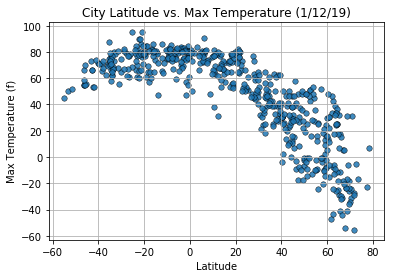

In [6]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Max Temperature"], 
            marker="o", 
            s=30, 
            linewidth=0.5, 
            edgecolor="black", 
            alpha=0.85)

plt.title("City Latitude vs. Max Temperature (1/12/19)") 
plt.ylabel("Max Temperature (f)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(temp_chart_file, format="svg")
plt.show()

#### Latitude vs. Humidity Plot

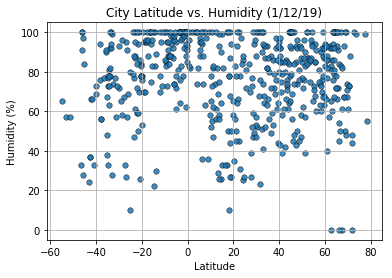

In [7]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Humidity"], 
            marker="o", 
            s=30, 
            linewidth=0.5, 
            edgecolor="black", 
            alpha=0.85)

plt.title("City Latitude vs. Humidity (1/12/19)") 
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(humidity_chart_file, format="svg")
plt.show()

#### Latitude vs. Cloudiness Plot

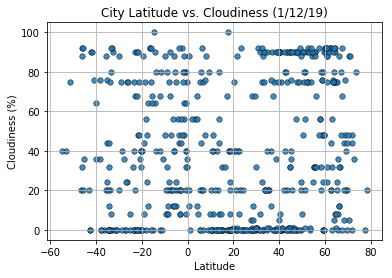

In [8]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Cloudiness"], 
            marker="o", 
            s=30, 
            linewidth=0.5, 
            edgecolor="black", 
            alpha=0.85)

plt.title("City Latitude vs. Cloudiness (1/12/19)") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(cloudiness_chart_file, format="svg")
plt.show()

#### Latitude vs. Wind Speed Plot

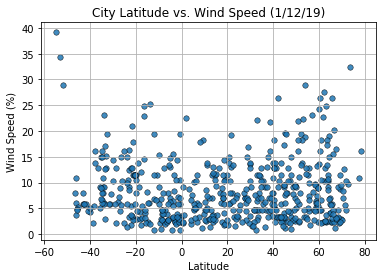

In [9]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Wind Speed"], 
            marker="o", 
            s=30, 
            linewidth=0.5, 
            edgecolor="black", 
            alpha=0.85)

plt.title("City Latitude vs. Wind Speed (1/12/19)")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(wind_chart_file, format="svg")
plt.show()